# Feature Engineering

## Categorical Features

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [41]:
data = [dict(price=850000, rooms=4, neighborhood='Queen Anne'), dict(price=700000, rooms=3, neighborhood='Fremont'), 
        dict(price=540000, rooms=3, neighborhood='Wallingford'), dict(price=600000, rooms=2, neighborhood='Fremont')]

pd.DataFrame(data)

,neighborhood,price,rooms
0,Queen Anne,850000,4
1,Fremont,700000,3
2,Wallingford,540000,3
3,Fremont,600000,2


**one-hot encoding:** Creates extra columns indicating presence or absence of a category with a value of 1 or 0, respectively. e.g. makes an extra vector for each category, with a 1 in the ith row indicating that the row belongs to that category.

In [48]:
# Use scikit-learn's DictVector to use one-hot encoding to do this. Make 'vec', a variable with the one-hot encoded features matrix.
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)

vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 540000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int32)

In [49]:
# Figure out what column vector corresponds to which category in the "neighborhood" categorical variable
vec.feature_names_

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [50]:
# Use a sparse output instead for situations where there are a lot of different categories and n_features would become ridiculous. Make the sparse matrix.
vec = DictVectorizer(dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [ ]:
# Convert to a DataFrame and visualize


## Text Features

In [51]:
# Sample to vectorize
sample = ['problem of evil',
         'evil queen',
         'horizon problem']

In [63]:
# Grab the CountVectorizer function, which encodes data by word counts
from sklearn.feature_extraction.text import CountVectorizer

# Make an instance of the CountVectorizer class, then save its fit_transform to the sample as X.
vec = CountVectorizer()
X = vec.fit_transform(sample)

In [63]:
# Convert to pandas DataFrame
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


Rows are the elements of the 'sample' list. Columns are particular words.

**Problem:** words that appear a lot are heavily-weighted. <br />
**Solution**: term frequency-inverse document frequency (TD-IDF). Weights word counts by how often they appear in the documents.

In [69]:
# Grab the TD-IDF vectorizer.
from sklearn.feature_extraction.text import TfidfVectorizer

# Make a class instance, transform-fit the sample to it as X, see what it looks like as a DataFrame (same steps as above)
vec = TfidfVectorizer()
X = vec.fit_transform(sample)

pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## Image Features

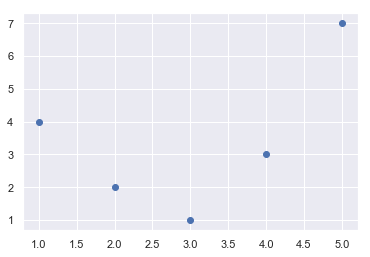

In [70]:
# Make some data that can't be clearly described by a straight line

x = np.array((1, 2, 3, 4, 5))
y = np.array((4, 2, 1, 3, 7))
plt.scatter(x, y);

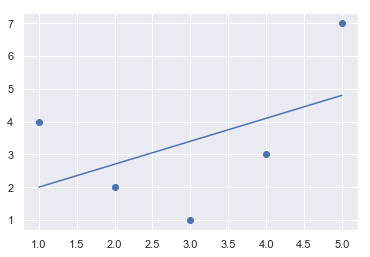

In [78]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model to it anyway
X = x[:, None]
model = LinearRegression()
model.fit(X, y)

# Predict and plot
ynew_ = model.predict(X)
plt.scatter(x, y)
plt.plot(x, ynew_);

In [135]:
dc = dict(a=1, b=2, c=3, d=4, e=5, f=6, 
        g=7, h=8, i=9, j=10, k=11, l=12,
        m=13, n=14, o=15, p=16, q=17, r=18, 
        s=19, t=20, u=21, v=22, w=23, x=24,
        y=25, z=26)

In [77]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features to this features matrix, as the variable X2


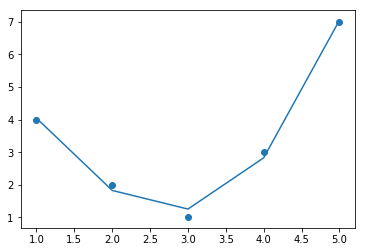

In [65]:
# Do a linear regression on this new polynomial features matrix 


## Imputation of Missing Data

In [3]:
import numpy as np
from numpy import nan

X = np.array([[nan, 0, 3],
             [3, 7, 9],
             [3, 5, 2],
             [4, nan, 6],
             [8, 8, 1]])

y = np.array([14, 16, -1, 8, -5])

In [4]:
X

array([[ nan,   0.,   3.],
       [  3.,   7.,   9.],
       [  3.,   5.,   2.],
       [  4.,  nan,   6.],
       [  8.,   8.,   1.]])

In [13]:
# Use the Imputer class to replace every nan with the average of the column


array([[ 4.5,  0. ,  3. ],
       [ 3. ,  7. ,  9. ],
       [ 3. ,  5. ,  2. ],
       [ 4. ,  5. ,  6. ],
       [ 8. ,  8. ,  1. ]])

In [19]:
# Fit a linear regression, then predict X2


array([ 13.14869292,  14.3784627 ,  -1.15539732,  10.96606197,  -5.33782027])

In [35]:
# Make a pipeline that imputes NaN values using the mean, transforms all features to quadratic, and then fits a linear regression

# Import the function for making a pipeline
from sklearn.pipeline import make_pipeline

# Make the model

In [37]:
# Fit the model to X and y

[14 16 -1  8 -5]
[ 14.  16.  -1.   8.  -5.]
